In [1]:
from pylab import *
from scipy.ndimage import measurements


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx

In [2]:
%matplotlib inline

rcParams['figure.figsize'] = (12, 8)

p0 = 0.05


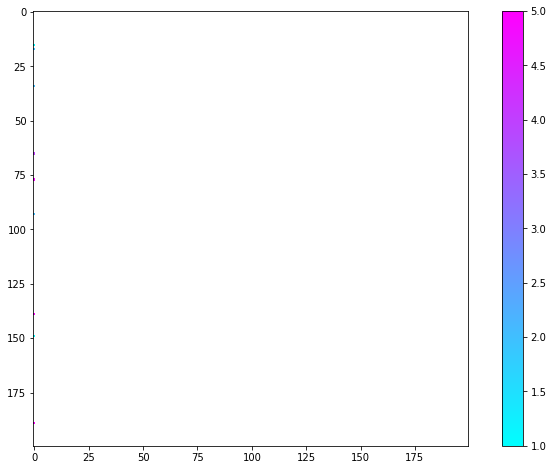

p0 = 0.1


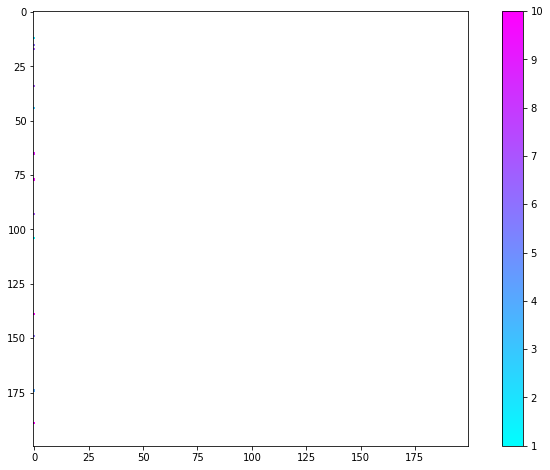

p0 = 0.15


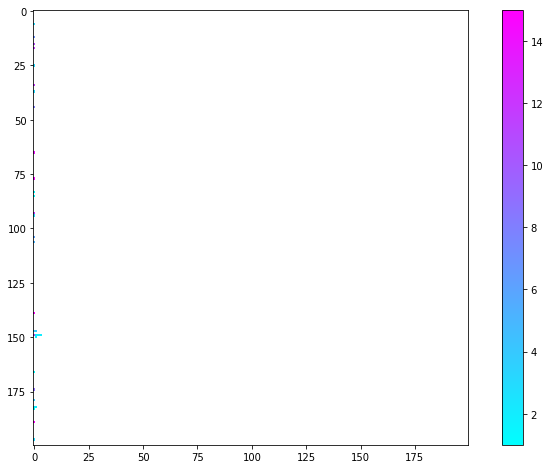

p0 = 0.2


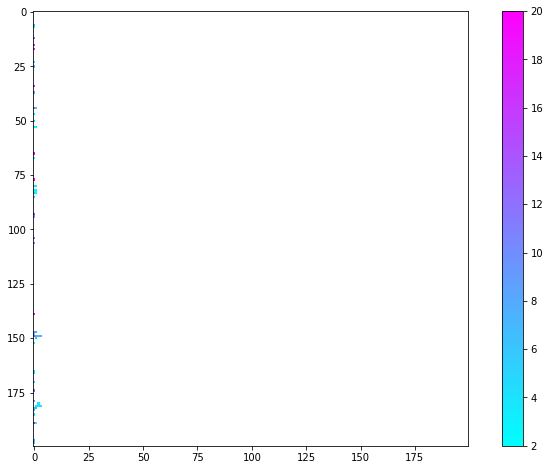

p0 = 0.25


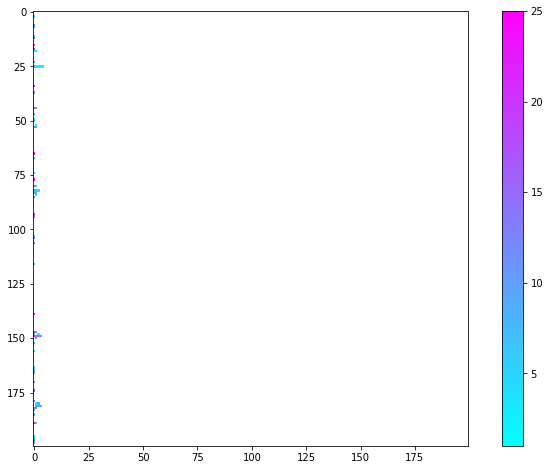

p0 = 0.3


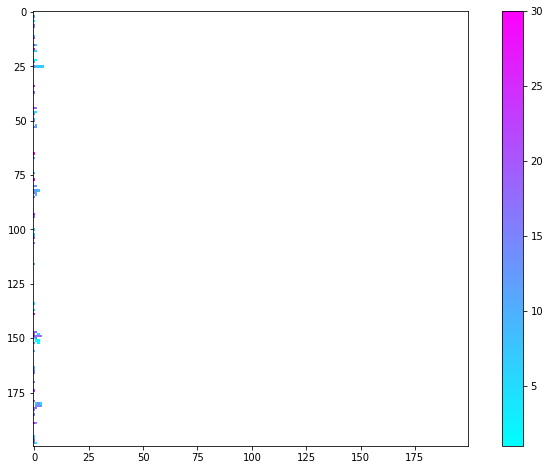

p0 = 0.35


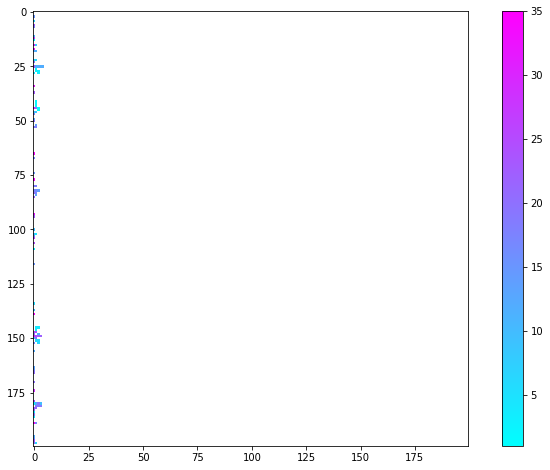

p0 = 0.4


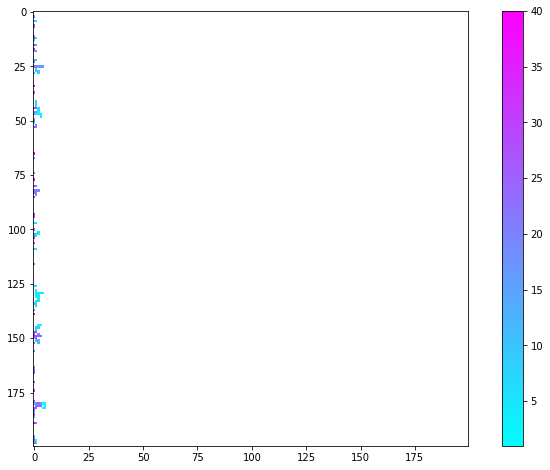

p0 = 0.45


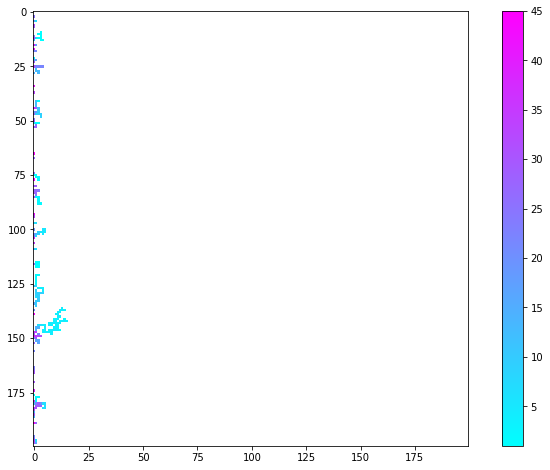

p0 = 0.5


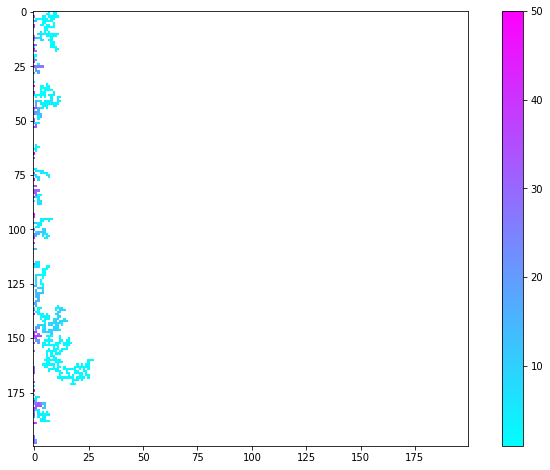

p0 = 0.55


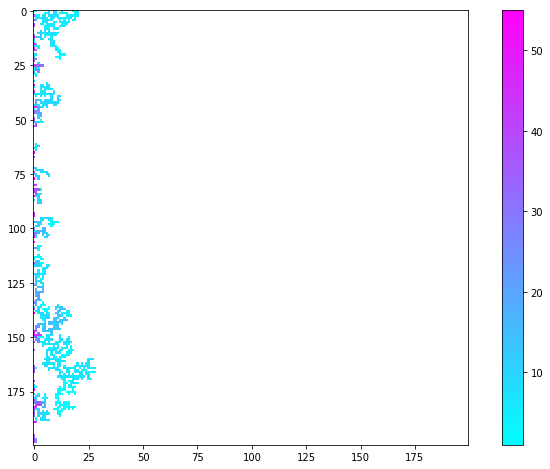

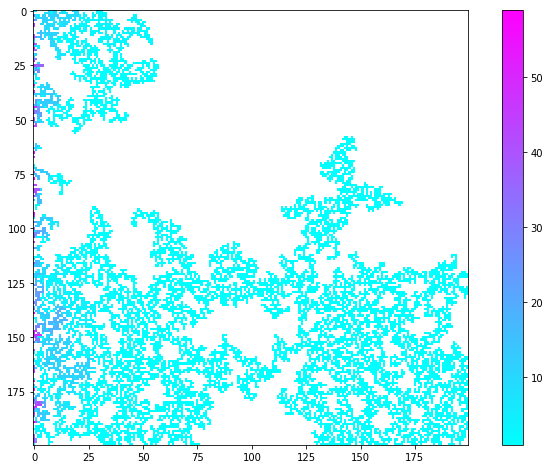

p0 = 0.59


In [3]:
fig = figure()

L = 200 # system size
p = linspace(0,0.7,71)
perc = 0 # flag to signal if other end is reached
nbetween = 5
nstep = 0
nend = len(p)
nstop = 0
z = rand(L,L)  # Random distribution of thresholds 
pcluster = zeros((L,L)) 

while nstop==0 and nstep < nend: 
    nstep = nstep + 1 
    p0 = p[nstep] 
    zz = z<p0 
    [lw,num] = measurements.label(zz) 
    leftside = lw[:,0] 
    il = argwhere(leftside>0)
    leftnonzero = leftside[il]  
    #print leftside
    uniqueleftside = unique(leftnonzero) 
    #print uniqueleftside
    cluster = isin(lw, uniqueleftside) #ismember(lw,uniqueleftside)
    pcluster = pcluster + cluster.astype(float) 
    #print pcluster

    if (nstep % nbetween==0):
        pcluster_masked = np.ma.masked_where(pcluster == 0, pcluster)
        imshow(pcluster_masked, cmap=cm.cool)
        colorbar()
        print "p0 = {}".format(p0)
        draw()
        pause(.01)
        show()
        
       

    # Check if it has reached the right hand side
    rightside = lw[:,-1] 
    ir = argwhere(rightside>0) 
    rightnonzero = rightside[ir] 
    span = intersect1d(leftnonzero,rightnonzero)
    if len(span)>0: 
        nstop = 1  # spanning end

pcluster_masked = np.ma.masked_where(pcluster == 0, pcluster)
im = imshow(pcluster_masked, cmap=cm.cool)
colorbar()
draw()
show()

print "p0 = {}".format(p0)

TypeError: object of type 'int' has no len()

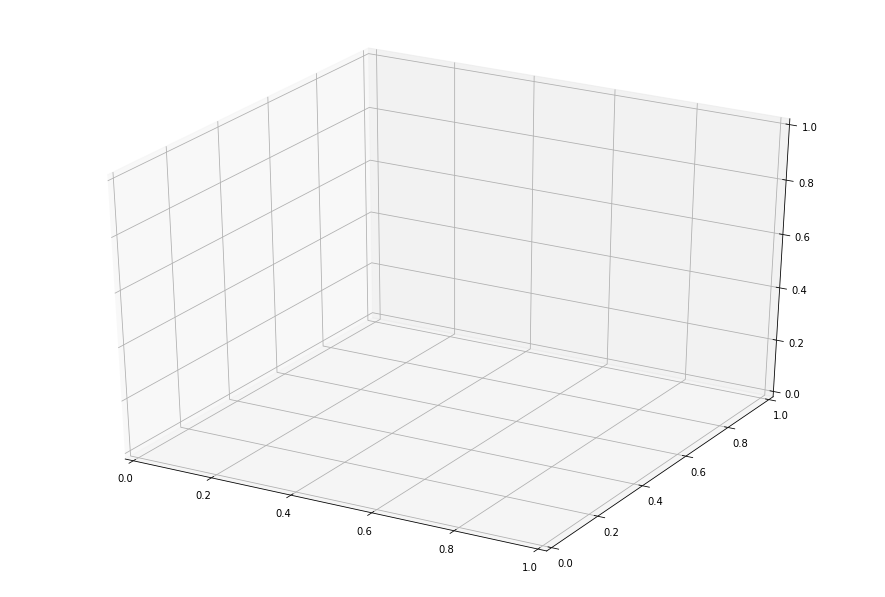

In [4]:
fig = figure()
ax = Axes3D(fig)


L = 100 # system size
p = linspace(0,0.7,71)
perc = 0 # flag to signal if other end is reached
nbetween = 5
nstep = 0
nend = len(p)
nstop = 0
z = rand(L, L, L)  # Random distribution of thresholds
xx = linspace(0, L, len(L))
yy = linspace(0, L, len(L))
zz = linspace(0, L, len(L))

pcluster = zeros((L, L, L)) 
while ((nstop==0) and (nstep<nend)): 
    nstep = nstep + 1 
    p0 = p[nstep] 
    zz = z<p0 
    [lw,num] = measurements.label(zz) 
    leftside = lw[:,0] 
    il = argwhere(leftside>0)
    leftnonzero = leftside[il]  
    #print leftside
    uniqueleftside = unique(leftnonzero) 
    #print uniqueleftside
    cluster = isin(lw, uniqueleftside) #ismember(lw,uniqueleftside)
    pcluster = pcluster + cluster.astype(float) 
    #print pcluster

    #if (nstep % nbetween==0):
    #    pcluster_masked = np.ma.masked_where(pcluster == 0, pcluster)
    #    imshow(pcluster_masked, cmap=cm.cool)
    #    colorbar()
    #    draw()
    #    pause(.01)
    #    show()

    # Check if it has reached the right hand side
    rightside = lw[:,-1] 
    ir = argwhere(rightside>0) 
    rightnonzero = rightside[ir] 
    span = intersect1d(leftnonzero,rightnonzero)
    if len(span)>0: 
        nstop = 1  # spanning end

pcluster_masked = np.ma.masked_where(pcluster == 0, pcluster)
im = imshow(pcluster_masked, cmap=cm.cool)
colorbar()
draw()
show()
print "p0 = {}".format(p0)